## Bike Sharing Demand
Data Fields  
datetime - hourly date + timestamp   
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter  
holiday - whether the day is considered a holiday  
workingday - whether the day is neither a weekend nor holiday  
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   
temp - temperature in Celsius  
atemp - "feels like" temperature in Celsius  
humidity - relative humidity  
windspeed - wind speed  
casual - number of non-registered user rentals initiated  
registered - number of registered user rentals initiated  
count - number of total rentals  

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE

In [41]:
import pandas as pd
df = pd.read_csv('train_bike.csv', parse_dates=True, index_col=0)
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [42]:
df.index.year

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=10886)

In [43]:
df.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='datetime', length=10886)

## Exploratory data analyses

In [44]:
df.shape

(10886, 11)

In [45]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [46]:
#sns.pairplot(df)

In [47]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


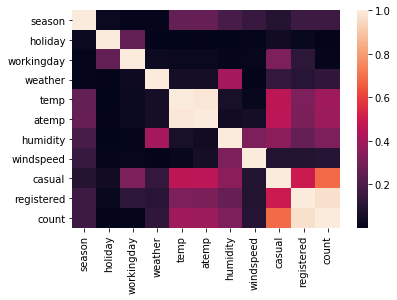

In [48]:
sns.heatmap(df.corr().abs())

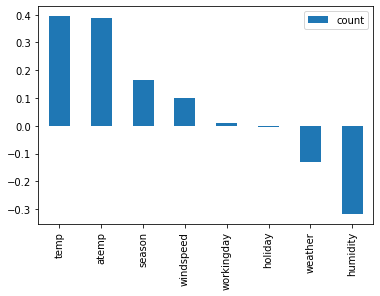

In [49]:
pd.DataFrame(df.corr()['count'].sort_values(ascending=False)).drop(['count','casual','registered']).plot(kind="bar")

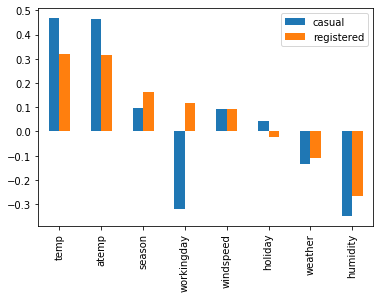

In [50]:
pd.DataFrame(df.corr()[['casual','registered']].sort_values(ascending=False,by='registered')).drop(['count','casual','registered']).plot(kind="bar")

In [51]:
#df['count'].loc['May 2, 2011':'May 8, 2011'].plot()

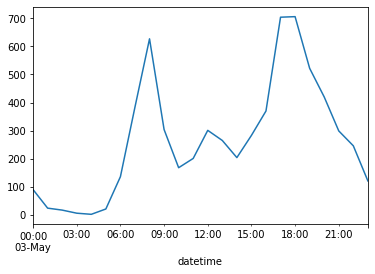

In [52]:
df['count'].loc['May 3, 2012'].plot()

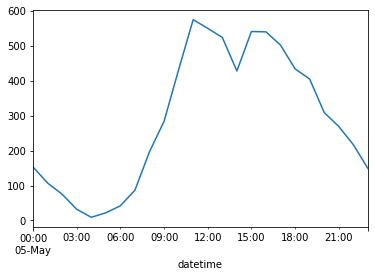

In [53]:
df['count'].loc['May 5, 2012'].plot()

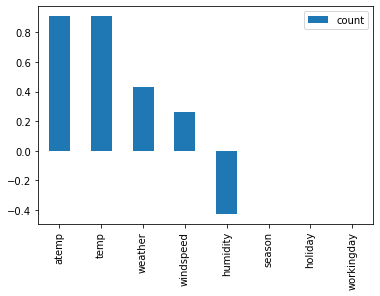

In [54]:
pd.DataFrame(df.loc['May 1, 2011'].corr()['count'].sort_values(ascending=False)).drop(['count','casual','registered']).plot(kind="bar")

In [55]:
df.resample('1M').mean().head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-31,1.0,0.055684,0.612529,1.440835,8.633782,10.767981,56.308585,13.749830,4.658933,49.986079,54.645012
2011-02-28,1.0,0.000000,0.733184,1.378924,11.331076,13.999922,53.580717,15.509298,8.466368,65.174888,73.641256
2011-03-31,1.0,0.000000,0.735426,1.466368,14.063184,16.895594,55.923767,16.033866,17.735426,69.114350,86.849776
2011-04-30,2.0,0.052747,0.630769,1.619780,17.776879,21.239835,66.285714,15.844234,26.876923,84.149451,111.026374
2011-05-31,2.0,0.000000,0.736842,1.528509,21.528596,25.455143,71.421053,12.355358,34.791667,140.017544,174.809211


In [56]:
df['count'].resample('1M').mean().plot

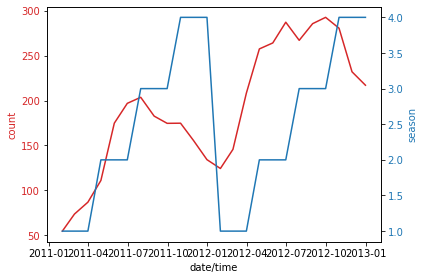

In [57]:
import numpy as np
import matplotlib.pyplot as plt

data1 = df['count'].resample('1M').mean()
data2 = df['season'].resample('1M').mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date/time')
ax1.set_ylabel('count', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('season', color=color)
ax2.plot(data2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

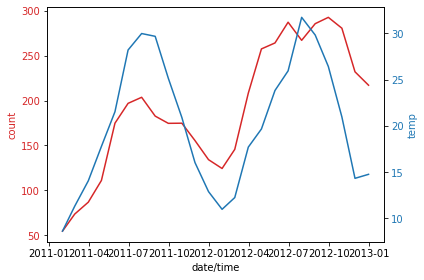

In [58]:
data1 = df['count'].resample('1M').mean()
data2 = df['temp'].resample('1M').mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date/time')
ax1.set_ylabel('count', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('temp', color=color)
ax2.plot(data2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

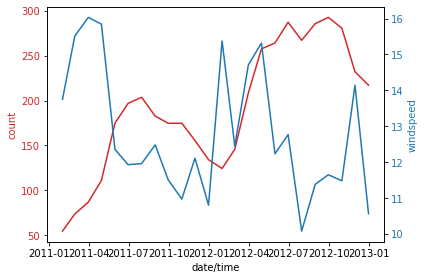

In [59]:
data1 = df['count'].resample('1M').mean()
data2 = df['windspeed'].resample('1M').mean()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('date/time')
ax1.set_ylabel('count', color=color)
ax1.plot(data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('windspeed', color=color)
ax2.plot(data2,color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

## Train-test split

In [60]:
X = df.drop(['count'], axis=1)
y = df['count']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 10), (2722, 10), (8164,), (2722,))

## Feature engineering

In [63]:
#check for missing values
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [64]:
def feature_engineer(df):

        # drop atemp due to high correlation with temp
        if 'casual' in df.columns:
            df.drop(['casual'], axis=1, inplace=True)

        # drop humidity due to high correlation with weather
        if 'registered' in df.columns:
            df.drop(['registered'], axis=1, inplace=True)          

        # drop atemp due to high correlation with temp
        if 'atemp' in df.columns:
            df.drop(['atemp'], axis=1, inplace=True)

        # drop humidity due to high correlation with weather
        #if 'humidity' in df.columns:
            #df.drop(['humidity'], axis=1, inplace=True)   
        
        #df['temp'] = ['under_15' if x<15.0 else 'over_15' for x in df['temp']]
        
        # create a feature day hours
        df.reset_index(inplace=True)
        df['hour'] = pd.DatetimeIndex(df['datetime']).hour
        #df['day'] = pd.DatetimeIndex(df['datetime']).day_name()
        df.set_index(['datetime'], inplace=True)
        #df['hour'] = [1 if 8.00<=x<=20.00 else 0 for x in df['hour']] 
        
        hours=[]
        for i, row in df.iterrows():
            day = row['workingday']
            hour = row['hour']
            if day == 0:
                if 9.00<=hour<=20.00:
                    hr='peak'
                else:
                    hr='night'
            else:
                if (8.00<=hour<=9.00) or (17.00<=hour<=19.00):
                    hr='peak'
                elif 9.00<hour<17.00:
                    hr='day'
                else:
                    hr='night'
            hours.append(hr)
        df['hour']=hours
        

        # Rename weather groups for str 
        df['weather'].replace({1:'class_1', 2:'class_2', 3:'class_3', 4:'class_4'}, inplace=True)
    
        # Rename season groups for str 
        df['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'}, inplace=True)
                
        #df[['season', 'workingday', 'weather', 'temp', 'windspeed','hour', 'humidity']]
        df_final = df[['season','weather', 'temp', 'windspeed','hour']]
    
        # Label encoding / one-hot encoding, create binary columns out of original categories
        df_final = pd.get_dummies(df_final, drop_first=True)
        
        if 'weather_class_4' in df_final.columns:
            df_final.drop(['weather_class_4'], axis=1, inplace=True)
        
        pf = PolynomialFeatures(degree=3)
        df_final=pd.DataFrame(pf.fit_transform(df_final))
        
        return df_final

## Train a model

In [65]:
m = LinearRegression()

In [66]:
sc = MinMaxScaler()

X_train_fe = feature_engineer(X_train)
sc.fit(X_train_fe)
X_train_scaled = pd.DataFrame(sc.transform(X_train_fe))

X_test_fe = feature_engineer(X_test)
X_test_scaled = pd.DataFrame(sc.transform(X_test_fe))

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [67]:
X_train_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,0.0,0.489796,0.350888,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.612245,0.105325,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.897959,0.263195,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
X_test_scaled.head(3)

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,0.0,0.714286,0.193018,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.795918,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.428571,0.298225,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
m.fit(X_train_scaled, np.log1p(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
#m.coef_, m.intercept_

In [71]:
ypred = m.predict(X_train_scaled)

In [72]:
#plt.plot(X_train_scaled, ypred)

## Optimize the model

### Ridge / Lasso Regularization

In [73]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
m_ridge = Ridge(alpha=0.001)
m_lasso = Lasso(alpha=0.001)

m_ridge.fit(X_train_scaled, np.log1p(y_train))
m_lasso.fit(X_train_scaled, np.log1p(y_train))

ypred = m.predict(X_train_scaled)
ypred_ridge = m_ridge.predict(X_train_scaled)
ypred_lasso = m_lasso.predict(X_train_scaled)

In [74]:
#m_ridge.coef_

In [75]:
#m_lasso.coef_

In [76]:
#plt.scatter(X_train_scaled, y_train)
#plt.plot(X_train_scaled, ypred)
#plt.plot(X_train_scaled, ypred_ridge)
#plt.plot(X_train_scaled, ypred_lasso)
#plt.legend(['No regularization', 'Ridge Regularization', 'Lasso Regularization'])

In [77]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics
from sklearn.metrics import make_scorer

model = Lasso()
paramgrid={'alpha':[5.0, 3.0, 1.0, 0.1, 0.01, 0.001]}
scorer = { 'RMSLE': metrics.make_scorer(np.sqrt(mean_squared_log_error))} #(y_train, np.exp(ypred_lasso)

grid = GridSearchCV(model, param_grid=paramgrid, scoring= scorer)
grid.fit(X_train_scaled, np.log1p(y_train))
ypred_grid = grid.predict(X_train_scaled)

print("Best parameters:", grid.best_params_)
#print("RMSLE:", RMSLE((y_train, np.exp(ypred_grid)))
#print("Best score:", grid.best_score_)
#print("all scores      :")
#pprint(grid.cv_results_)

TypeError: loop of ufunc does not support argument 0 of type function which has no callable sqrt method

In [78]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics
from sklearn.metrics import make_scorer

model = Ridge()
paramgrid={'alpha':[5.0,3.0,1.0, 0.1, 0.01, 0.001]}

grid = GridSearchCV(model, param_grid=paramgrid, scoring='r2')

grid.fit(X_train_scaled,y_train)
preds = grid.predict(X_train_scaled)
print("Best parameters:", grid.best_params_)
#print("RMSLE:", rmsle(y_train, ypred_lasso))
print("Best score:", grid.best_score_)
print("all scores      :")
pprint(grid.cv_results_)

Best parameters: {'alpha': 0.1}
Best score: 0.5907938054357682
all scores      :
{'mean_fit_time': array([0.11732435, 0.09294367, 0.085147  , 0.08334646, 0.072156  ,
       0.10113678]),
 'mean_score_time': array([0.00560002, 0.00459867, 0.00599937, 0.00739784, 0.0057982 ,
       0.00399971]),
 'mean_test_score': array([0.58912195, 0.58967999, 0.59044575, 0.59079381, 0.59047173,
       0.59019541]),
 'param_alpha': masked_array(data=[5.0, 3.0, 1.0, 0.1, 0.01, 0.001],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'alpha': 5.0},
            {'alpha': 3.0},
            {'alpha': 1.0},
            {'alpha': 0.1},
            {'alpha': 0.01},
            {'alpha': 0.001}],
 'rank_test_score': array([6, 5, 3, 1, 2, 4]),
 'split0_test_score': array([0.5845276 , 0.58542542, 0.58667027, 0.58847813, 0.58945514,
       0.58949003]),
 'split1_test_score': array([0.59584849, 0.59613375, 0.59635568, 0.59592318, 0.59554064

In [79]:
df_scr = pd.DataFrame()
df_scr['alpha']=[5.0,3.0,1.0, 0.1, 0.01, 0.001]
df_scr['score']=grid.cv_results_['mean_test_score']
df_scr

,alpha,score
0,5.000,0.589122
1,3.000,0.589680
2,1.000,0.590446
3,0.100,0.590794
4,0.010,0.590472
5,0.001,0.590195


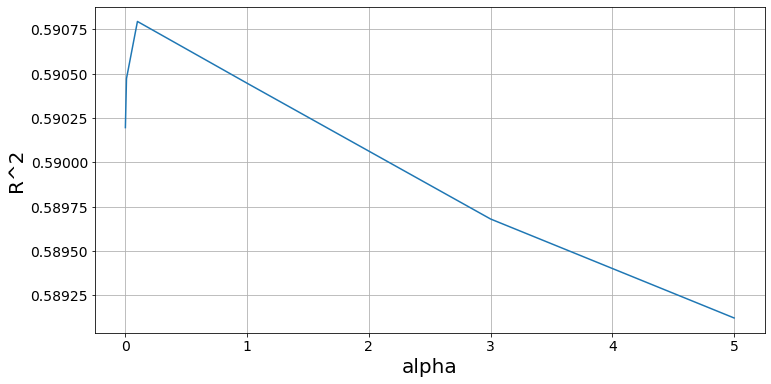

In [107]:
plt.figure(figsize=(12,6))
x = df_scr['alpha']
y = df_scr['score']
plt.xlabel('alpha', fontsize=20)
plt.ylabel('R^2', fontsize=20)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.grid()
plt.plot(x,y)

### Recursive Feature Elimination

In [84]:
#model=LinearRegression()
#rfe = RFE(estimator=model)
#rfe.fit(X_train_scaled, y_train)

#df_final = df[['season', 'workingday', 'weather', 'temp', 'windspeed','hour']]
#print(rfe.n_features_)
#print(rfe.support_)
#print(rfe.ranking_)
#print(rfe.estimator_.feature_importances_)

In [85]:
#df_rf1 = pd.DataFrame()
#df_rf1['No']=np.where(rfe.support_ == True)[0]
#df_rf1['value']=rfe.estimator_.feature_importances_
#df_rf2 = pd.DataFrame()
#df_rf2['feature'] = X_train_scaled.columns
#df_rf2['RFE_support'] = rfe.support_
#df_rfe=pd.merge(df_rf1, df_rf2, left_on=['No'], right_index=True, how = 'inner')
#df_rfe.sort_values(by='value', ascending=False, inplace=True)
#df_rfe

In [86]:
#plt.figure(figsize=(10, 5))
#plt.barh(y=df_rfe['feature'], width=df_rfe['value'])
#plt.title('RFE - Feature Importances', fontsize=15, fontweight='bold', pad=10)
#plt.xlabel('Importance', fontsize=15, labelpad=20)
#plt.show()

## Cross-validation

In [87]:
from sklearn.model_selection import cross_val_score

In [88]:
#  scoring parameter - model.score() method - by default R-squared
cv_results = cross_val_score(m, X_train_scaled, y_train, cv=5)
cv_results

array([0.58921566, 0.59522113, 0.60327769, 0.58137851, 0.58165889])

In [89]:
cv_results.mean()
# we would expect that this roughly corresponds to the final testing score.
# if training score >> mean(validation scores), then you are overfitting!

0.590150375564256

In [90]:
cv_results.std()
# To check your model's variance, compute the standard deviation of all the scores. 
# If this variance is HIGH, it means your model's performance varies a lot / depends a lot on the sampling.

0.008342227789861335

## Calculate a test score

In [91]:
from sklearn.metrics import mean_squared_log_error

In [92]:
#print('Linear regression train score:', m.score(X_train_scaled, y_train))
#print('Linear regression test score:', m.score(X_test_scaled, y_test))
m.fit(X_train_scaled, np.log1p(y_train))
ypred = m.predict(X_train_scaled)
print('RMSLE Linear:', np.sqrt(mean_squared_log_error( y_train,np.exp(ypred) )))

RMSLE Linear: 0.9613447773703736


In [93]:
#print('Ridge regression train score:', m_ridge.score(X_train_scaled, y_train))
#print('Ridge regression test score:', m_ridge.score(X_test_scaled, y_test))
m_ridge.fit(X_train_scaled, np.log1p(y_train))
ypred_ridge = m_ridge.predict(X_train_scaled)
print('RMSLE Ridge:', np.sqrt(mean_squared_log_error( y_train,np.exp(ypred_ridge))))

RMSLE Ridge: 0.9607815514051838


In [94]:
#print('Lasso regression train score:', m_lasso.score(X_train_scaled, y_train))
#print('Lasso regression test score:', m_lasso.score(X_test_scaled, y_test))
m_lasso.fit(X_train_scaled, np.log1p(y_train))
ypred_lasso = m_lasso.predict(X_train_scaled)
print('RMSLE Lasso:', np.sqrt(mean_squared_log_error( y_train,np.exp(ypred_lasso))))

RMSLE Lasso: 0.9734277781296415


### OLS Statsmodels

In [95]:
import statsmodels.api as sm

#OLS = sm.OLS(y_train, X_train_scaled)
#f = OLS.fit()
#print(f.params)
#print(f.summary())

## Submit to Kaggle

In [96]:
X_kaggle=pd.read_csv('test_bike.csv', parse_dates=True, index_col=0)
X_kaggle.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [97]:
X_kaggle.shape

(6493, 8)

In [98]:
X_kaggle_fe = feature_engineer(X_kaggle)
X_kaggle_scaled = pd.DataFrame(sc.transform(X_kaggle_fe))
X_kaggle_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,0.0,0.244898,0.456213,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.244898,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.244898,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.244898,0.193018,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.244898,0.193018,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
ypred = np.exp(m_lasso.predict(X_kaggle_scaled))
ypred.shape

(6493,)

In [100]:
X_kaggle['count'] = ypred
df_final_bike = X_kaggle['count']
df_final_bike

datetime
2011-01-20 00:00:00     21.894120
2011-01-20 01:00:00     24.040346
2011-01-20 02:00:00     24.040346
2011-01-20 03:00:00     23.107757
2011-01-20 04:00:00     23.107757
                          ...    
2012-12-31 19:00:00    151.475180
2012-12-31 20:00:00     20.005885
2012-12-31 21:00:00     23.107757
2012-12-31 22:00:00     23.274841
2012-12-31 23:00:00     23.274841
Name: count, Length: 6493, dtype: float64

In [101]:
df_final_bike.to_csv('df_final_bike_andrey')

Name
Submitted
Wait time
Execution time
Score
df_final_bike_andrey (3)
just now
1 seconds
0 seconds
0.97813